In [279]:
%pip install pymdptoolbox

Note: you may need to restart the kernel to use updated packages.


In [280]:
import mdptoolbox.mdp
import mdptoolbox.example
import numpy as np

## Forest Management Example
* Trees can be either young, middle-aged, or old (states = 0, 1, 2)
* Each year, the trees get one stage older (S+1).
* Each year, there is a 10% chance that the whole forest burns down!
* If the forest burns down, you get nothing.
* If you cut down the trees, you get 0 points for a young one, 1 point for a middle-aged one, and 2 points for an old one.
* If the forest reaches its oldest state, and you do not cut, you will receive 4 points!

What is the best strategy, given these facts?

In [281]:
#inputs
'''
    S: number of states (3)
    r1: reward received for 'waiting' from the oldest tree
    r2: reward received for 'cutting' the oldest tree
    p: probability of wildfire
'''

#output
'''
    P: transition probability matrix, array (A,S,S)
        A: possible actions
        S: possible states
    R: reward matrix, array (S, A)
'''

P, R = mdptoolbox.example.forest(S=3, r1=4, r2=2, p=0.1)

In [282]:
P[0] #PTM if waiting
P[1] #PTM if cutting

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [283]:
'''
    ex: what is probability that a forrest in its youngest state
    will advance to the next oldest if we wait?
'''
P[0][0][1]

0.9

In [284]:
'''
ex: what is the probability that a forest in its oldest state
 will burn down, if we wait?
'''
P[0][2][0]

0.1

In [285]:
#reward matrix has a shape  State[rows] x Action[columns] (S,A)
R

array([[0., 0.],
       [0., 1.],
       [4., 2.]])

In [286]:
#what record do we get if we choose to wait, and the forest is in its oldest state?
rewards_vector = R.T[0]
forrest_state = [0,0,1] #forrest is oldest in this current state
np.multiply(rewards_vector, forrest_state).sum()



4.0

In [287]:
#what reward do we get if we choose to wait, and the forest is in any other state?
rewards_vector = R.T[1]
forrest_state = [0,1,0] #forrest is oldest in this current state
print(np.multiply(rewards_vector, forrest_state).sum())

rewards_vector = R.T[1]
forrest_state = [1,0,0] #forrest is youngest in this current state
print(np.multiply(rewards_vector, forrest_state).sum())


1.0
0.0


In [288]:
#finding optimal policy, when  discount is significant
model = mdptoolbox.mdp.QLearning(P, R, discount=0.1)
model.run()
model.policy

(0, 1, 1)

In [289]:
#should we wait or cut in the youngest state?
model.policy[1]

1

In [290]:
#should we wait or cut in the youngest state?
model.policy[2]

1

In [291]:
#what if policy is very likely to continue in the future?
model = mdptoolbox.mdp.QLearning(P,R, discount=0.99)
model.run()
model.policy

(0, 0, 0)

In [292]:
import numpy as np
import matplotlib.pyplot as plt

slope:  -0.1157582504122276
intercept:  21.072577712317127


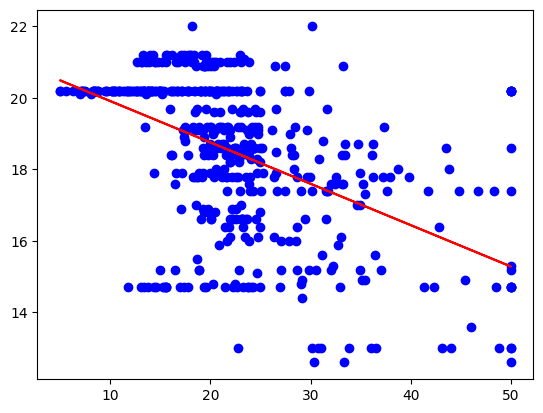

In [293]:
#input dataset
x = df['INDUS'].values
y= df['MEDV'].values

#mask out nan values
nan_mask = ~np.isnan(x) & ~np.isnan(y)
x = x[nan_mask]
y = y[nan_mask]

#calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

#comput numerator and denominator for m
numerator = np.sum((x - x_mean) *(y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

#calculate slope (m) intercept (b)
m = numerator / denominator
b = y_mean - (m * x_mean)

#display result
print("slope: ", m)
print("intercept: ", b)

plt.scatter(x, y, color= 'blue')
y_pred=  m * x+b
plt.plot(x, y_pred, color='red')
plt.show()

In [294]:
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)

print(mse, rmse)

3.536778545307563 1.8806324854440761


In [295]:
RSS = np.sum((y- y_pred) **2)
TSS = np.sum((y-np.mean(y))**2)
R2 = 1- (RSS/TSS)
print(R2)

0.2422107598008919


In [296]:
#in this town industrial land is 25% of total business land
industrial_land = 0.25

#what is median value of owner-occupied homes in this town?
median_home_value = m * industrial_land +b
print(median_home_value*1000)

21043.63814971407


In [297]:
import pandas as pd
from io import StringIO

In [298]:
#read file and skip first 21lines

with open('boston.txt', 'r') as f:
    lines = f.readlines()[21:]

data_lines = []

for i in range (0, len(lines), 2):
    line1 = lines[i].strip()
    line2 = lines[i+1].strip() if i+1 < len(lines) else ''
    full_line = f"{line1} {line2}"
    data_lines.append(full_line)

column_names = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS',
          'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(StringIO('\n'.join(data_lines)), 
                 delim_whitespace=True,
                 names= column_names)


/var/folders/qr/tq_ddlyx4778mx026msbqfsr0000gn/T/ipykernel_13793/996831989.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO('\n'.join(data_lines)),


<Axes: >

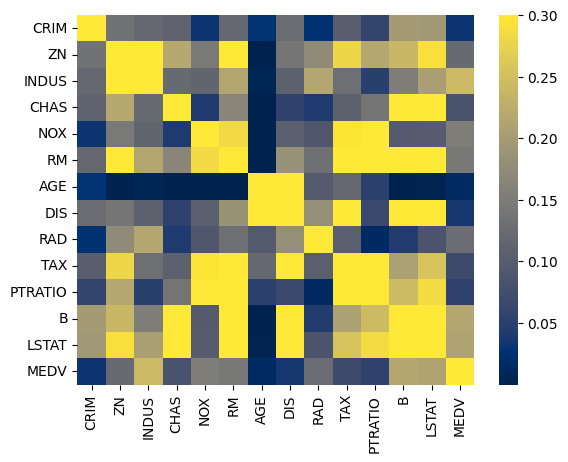

In [299]:
import seaborn as sns
corr_boston = np.power(df.corr(),2)
sns.heatmap(corr_boston, annot=False, cmap= 'cividis', vmax= 0.3)

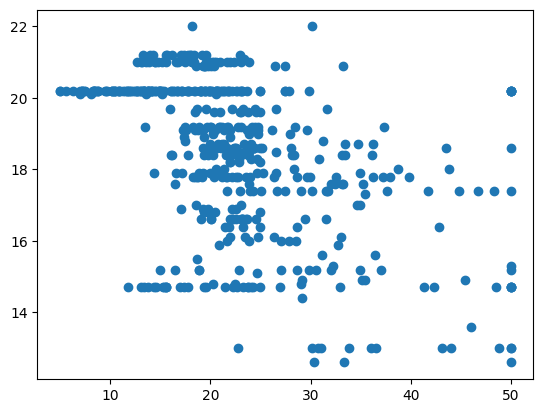

In [300]:
plt.plot(df['INDUS'], df['MEDV'], 'o')